In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0




Epoch 1/5


1563/1563 [==============================] - 1333s 851ms/step - loss: 1.2754 - accuracy: 0.5529 - val_loss: 1.1421 - val_accuracy: 0.5943
Epoch 2/5
1563/1563 [==============================] - 344s 220ms/step - loss: 0.8690 - accuracy: 0.6983 - val_loss: 0.8714 - val_accuracy: 0.7037
Epoch 3/5
1563/1563 [==============================] - 340s 218ms/step - loss: 0.7133 - accuracy: 0.7540 - val_loss: 0.7804 - val_accuracy: 0.7408
Epoch 4/5
1563/1563 [==============================] - 339s 217ms/step - loss: 0.6050 - accuracy: 0.7911 - val_loss: 0.7105 - val_accuracy: 0.7590
Epoch 5/5
313/313 [==============================] - 22s 69ms/step - loss: 0.6977 - accuracy: 0.7691
Epoch 1/5
1563/1563 [==============================] - 332s 212ms/step - loss: 1.4284 - accuracy: 0.4993 - val_loss: 1.1780 - val_accuracy: 0.5813
Epoch 2/5
1563/1563 [==============================] - 330s 211ms/step - loss: 1.0045 - accuracy: 0.6475 - val_loss: 1.0244 - val_accuracy: 0.6375
Epoch 3/5
1

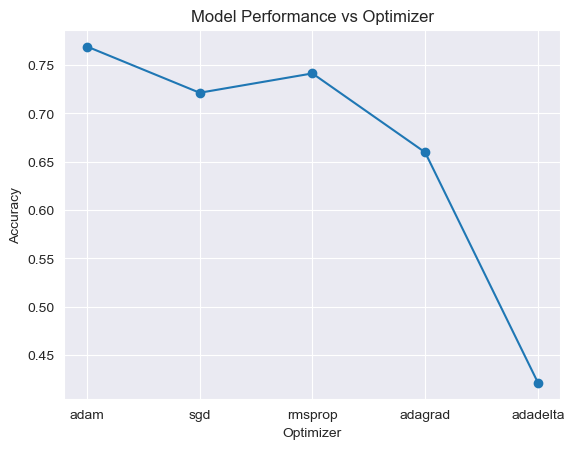

In [4]:
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta']
accuracies_optimizers = []

for optimizer_name in optimizers:
    # Create the model with the current optimizer
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer_name,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

    # Evaluate the model and record accuracy
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    accuracies_optimizers.append(test_acc)

# Plotting
plt.plot(optimizers, accuracies_optimizers, marker='o')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Optimizer')
plt.show()